In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime

### Import and preparing data

In [33]:
# Import data
data_orig = pd.read_excel('data\Azov sea freights.xlsx')                     
data_orig['Date'] = pd.to_datetime(data_orig['Date'])         

BDI = pd.read_excel('data\BDI.xlsx')                                    

In [21]:

Rost_Marm_freight = data_orig.set_index('Date').Marmara
Rost_Marm_freight = Rost_Marm_freight.resample('1M').ohlc()
fr = Rost_Marm_freight.close.values

BDI = BDI.set_index('Date')

In [23]:
#Convert to proper format
bdi = BDI.Close.values

numbers =list(bdi)
result = []

for number in numbers:
    number = number.replace('.', '').replace(',', '')
    result.append(int(number))
    
bdi = result

In [24]:
# Combine pre data set
df = pd.DataFrame({ 'Date' : list(BDI.index),
                  'Fr': list(fr)[::-1],
                  'BDI': bdi})

In [25]:
df = df.sort_values('Date').reset_index(drop=True)

In [27]:
df[:2]

,Date,Fr,BDI
0,2008-06-01,37.0,958900
1,2008-07-01,41.0,834100


In [28]:
# Calculate and add simple moving average with a window size of 3
df['sma_Fr'] = df['Fr'].rolling(window=3).mean()
df['sma_BDI'] = df['BDI'].rolling(window=3).mean()

In [30]:
df[:4]

,Date,Fr,BDI,sma_Fr,sma_BDI
0,2008-06-01,37.00,958900,NaN,NaN
1,2008-07-01,41.00,834100,NaN,NaN
2,2008-08-01,48.50,680900,42.166667,824633.333333
3,2008-09-01,35.25,321700,41.583333,612233.333333


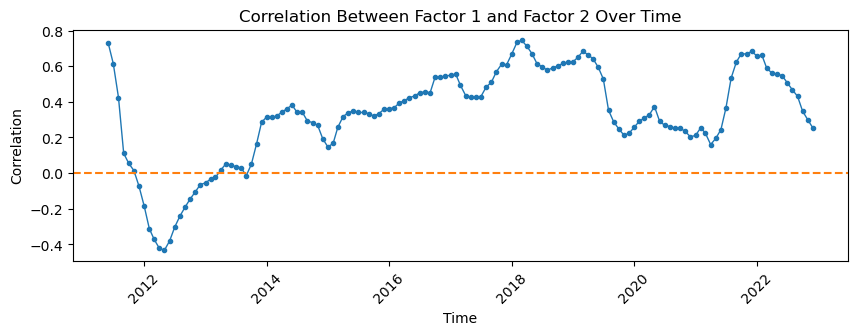

In [61]:
# Calculate and add correlation (p-period for calculating of(months))
p = 36
cor = pd.DataFrame(columns=['Date', 'corr'])

for i in range(len(df.Date)):
    if i >= p:
        date = df.Date[i]
        correlation = np.corrcoef(df.Fr[i-p:i+1], df.BDI[i-p:i+1])[0, 1]
        line_to_add = pd.DataFrame([[date, correlation]], columns=['Date', 'corr'])
        cor = pd.concat([cor, line_to_add], ignore_index=True)
        
# Create a line plot representing the correlation over time
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(np.array(cor['Date']), np.array(cor['corr']), marker='.', linestyle='-', linewidth=1)
ax.axhline(0.0 , linestyle='--', color='C1')
           
# Set labels and title
plt.xlabel('Time')
plt.ylabel('Correlation')
plt.title('Correlation Between Factor 1 and Factor 2 Over Time')

# Show the plot
plt.xticks(rotation=45)
plt.show()

In [70]:
#Combie datasets
merged_df = pd.merge(df, cor, on='Date')
merged_df[:5]

,Date,Fr,BDI,sma_Fr,sma_BDI,corr
0,2011-06-01,33.0,141300,25.333333,138733.333333,0.728399
1,2011-07-01,40.0,126400,31.500000,138566.666667,0.614149
2,2011-08-01,43.1,161900,38.700000,143200.000000,0.424178
3,2011-09-01,31.5,189900,38.200000,159400.000000,0.111272
4,2011-10-01,29.0,196500,34.533333,182766.666667,0.054950


In [76]:
merged_df.to_excel('C:/Users/Yuriy Podmogaev/Desktop/Коробка/Freight/data/Azov_Fr_VS_BDI_correlation.xlsx')

C:\Users\Yuriy Podmogaev\AppData\Local\Temp\ipykernel_6548\142520622.py:1: UserWarning: Pandas requires version '1.4.3' or newer of 'xlsxwriter' (version '1.3.8' currently installed).
  merged_df.to_excel('C:/Users/Yuriy Podmogaev/Desktop/Коробка/Freight/data/Azov_Fr_VS_BDI_correlation.xlsx')


In [77]:
merged_df.Fr.corr(merged_df.BDI)

0.41702927887704

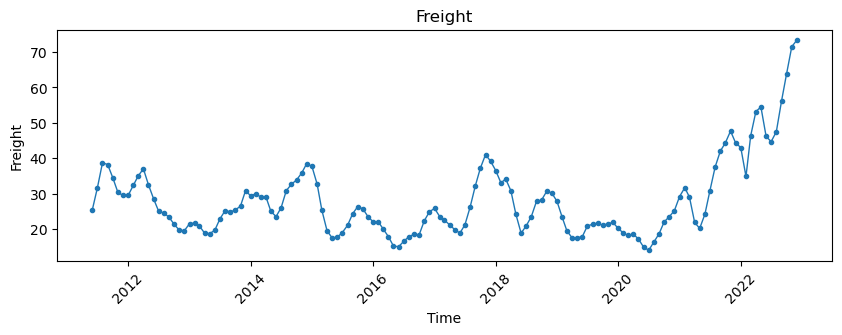

In [71]:
# Create a line plot representing the correlation over time
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(np.array(df[p:]['Date']), np.array(df[p:]['sma_Fr']), marker='.', linestyle='-', linewidth=1)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('Freight')
plt.title('Freight')

# Show the plot
plt.xticks(rotation=45)
plt.show()

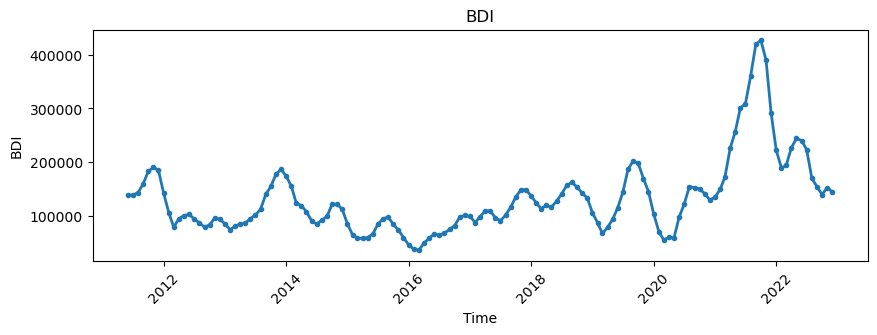

In [72]:
# Create a line plot representing the correlation over time
fig, ax = plt.subplots(figsize=(10, 3))
plt.plot(np.array(df[p:]['Date']), np.array(df[p:]['sma_BDI']), marker='.', linestyle='-', linewidth=2)

# Set labels and title
plt.xlabel('Time')
plt.ylabel('BDI')
plt.title('BDI')

# Show the plot
plt.xticks(rotation=45)
plt.show()

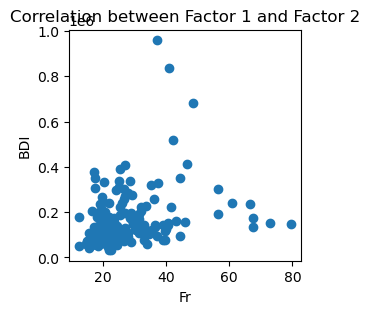

In [69]:
# Create a scatter plot
fig, ax = plt.subplots(figsize=(3, 3))
plt.scatter(df.Fr, df.BDI)
plt.xlabel('Fr')
plt.ylabel('BDI')
plt.title('Correlation between Factor 1 and Factor 2')

# Show the plot
plt.show()